In [ ]:
 # created by nov05 on 2019-06-24
# DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post-master

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

**Data Source**  
https://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data   

In [ ]:
# CAUTION: this dataset is 719 MB in size.

# this doesn't work for this large file (seems that it would work for file under 50 MB)
# url = "https://drive.google.com/uc?id=1giGHkApdv3ehRI7uw4LoLhGT6rN_uR0r"

# this works
# url = "https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD"
# df = pd.read_csv(url)

# this works
path = "/content/drive/My Drive/data/cfpd_consumer_complaints/Consumer_Complaints.csv"
df = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(df.shape) # (1315204, 18)
df.head(2)

(1315085, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,06/22/2019,Debt collection,Payday loan debt,Took or threatened to take negative or legal a...,Sued you without properly notifying you of law...,NaN,NaN,Nationwide Recovery Group LLC,OR,971XX,NaN,NaN,Web,06/22/2019,Closed with monetary relief,Yes,NaN,3283266
1,06/21/2019,"Payday loan, title loan, or personal loan",Installment loan,Struggling to pay your loan,NaN,NaN,NaN,"ONEMAIN FINANCIAL HOLDINGS, LLC.",IL,605XX,NaN,NaN,Web,06/21/2019,In progress,Yes,NaN,3282738


In [ ]:
# check NAs count and percentage for each column
nas = np.array(df.isna().sum())
pd.DataFrame([df.columns, nas, nas/df.shape[0] * 100]).T

,0,1,2
0,Date received,0,0
1,Product,0,0
2,Sub-product,235166,17.8822
3,Issue,0,0
4,Sub-issue,535176,40.6952
5,Consumer complaint narrative,925226,70.3548
6,Company public response,848541,64.5237
7,Company,0,0
8,State,20559,1.56332
9,ZIP code,119826,9.11165


# how did customer complain

In [ ]:
((df['Submitted via']
  .fillna('Unknown Channel')
  .value_counts() / df.shape[0] * 100)
  .round(2)
)

Web            73.94
Referral       13.42
Phone           5.95
Postal mail     5.21
Fax             1.46
Email           0.03
Name: Submitted via, dtype: float64

In [ ]:
# Consumer disputed?

((df['Consumer disputed?']
  .fillna('Unknown Status')
  .value_counts() / df.shape[0] * 100)
  .round(2)
)

No                47.15
Unknown Status    41.56
Yes               11.28
Name: Consumer disputed?, dtype: float64

In [ ]:
# Consumer consent provided?
((df['Consumer consent provided?']
#   .dropna()
  .fillna('Unknown')
  .value_counts() / df.shape[0] * 100)
  .round(2)
)

Unknown                 45.99
Consent provided        29.67
Consent not provided    22.52
Other                    1.73
Consent withdrawn        0.09
Name: Consumer consent provided?, dtype: float64

In [ ]:
# Consumer disputed?

((df['Consumer disputed?']
  .fillna('Unknown Status')
  .value_counts() / df.shape[0] * 100)
  .round(2)
)

No                47.15
Unknown Status    41.56
Yes               11.28
Name: Consumer disputed?, dtype: float64

# How did companies respond

In [ ]:
((df['Company public response']
  .fillna('Unknown Status')
  .value_counts() / df.shape[0] * 100)
  .round(2)
)

Unknown Status                                                                                                             64.52
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            24.87
Company believes it acted appropriately as authorized by contract or law                                                    4.77
Company chooses not to provide a public response                                                                            3.99
Company believes the complaint is the result of a misunderstanding                                                          0.44
Company disputes the facts presented in the complaint                                                                       0.41
Company believes complaint caused principally by actions of third party outside the control or direction of the company     0.31
Company believes complaint is the result of an isolated error                                    

In [ ]:
# Company response to consumer

((df['Company response to consumer']
#   .fillna('Unknown Status')
  .value_counts() / df.shape[0] * 100)
  .round(2)
)

Closed with explanation            77.51
Closed with non-monetary relief    12.45
Closed with monetary relief         5.75
Closed without relief               1.36
Closed                              1.34
In progress                         0.71
Untimely response                   0.48
Closed with relief                  0.40
Name: Company response to consumer, dtype: float64

In [ ]:
# Timely response?

((df['Timely response?']
  .fillna('NA')
  .value_counts() / df.shape[0] * 100)
  .round(2)
)

Yes    97.52
No      2.48
Name: Timely response?, dtype: float64

# convert datetime

In [ ]:
# convert datetime

df['datereceived'] = pd.to_datetime(df['Date received'], 
                                    format="%m/%d/%Y")
df['datesent'] = pd.to_datetime(df['Date sent to company'],
                                format="%m/%d/%Y")
df[['datereceived', 'datesent']].sample(4)

,datereceived,datesent
805769,2016-01-12,2016-01-12
434138,2017-10-01,2017-10-01
804439,2016-01-14,2016-01-19
670135,2016-09-27,2016-09-27


In [ ]:
# describe non-numeric columns
df.describe(exclude=np.number)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,datereceived,datesent
count,1315085,1315085,1079919,1315085,779909,389859,466544,1315085,1294526,1195259,179965,710315,1315085,1315085,1315078,1315085,768501,1315085,1315085
unique,2760,18,76,167,218,372832,10,5321,63,22769,3,4,6,2709,8,2,2,2760,2709
top,09/08/2017,Mortgage,Credit reporting,Incorrect information on your report,Information belongs to someone else,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,300XX,Servicemember,Consent provided,Web,09/08/2017,Closed with explanation,Yes,No,2017-09-08 00:00:00,2017-09-08 00:00:00
freq,3553,280698,237652,144799,65707,993,327095,120371,180075,7600,87235,390181,972343,3387,1019300,1282414,620123,3553,3387
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01 00:00:00,2011-12-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-22 00:00:00,2019-06-22 00:00:00


In [ ]:
# total row count = 1315204
len(df['Complaint ID'].unique())

1315085

time period (days): 2760


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


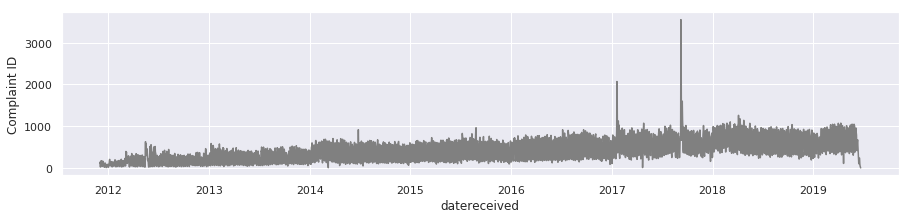

In [ ]:
# complaint distribution

print("time period (days):",
      (df['datereceived'].max() - 
       df['datereceived'].min()).days)

df_dates = (df.groupby(by='datereceived', as_index=False)
              .agg({'Complaint ID': pd.Series.nunique})
          )

sns.set()
fig, ax = plt.subplots(1,1, figsize=(15,3))
sns.lineplot(x='datereceived', y='Complaint ID', 
             data=df_dates,
             color='gray',
             ax=ax
            );

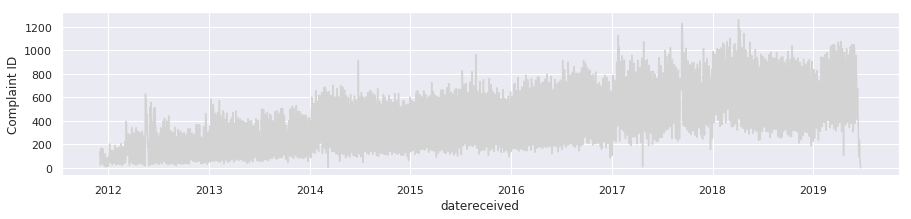

In [ ]:
# remove outliers
df_dates = df_dates[(np.abs(stats.zscore(df_dates['Complaint ID']))<3)]
sns.set()
fig, ax = plt.subplots(1,1, figsize=(15,3))
sns.lineplot(x='datereceived', y='Complaint ID', 
             data=df_dates,
             color='lightgray',
             ax=ax
            );

In [ ]:
df_dates.set_index('datereceived', inplace=True)
df_dates.head(2)

,Complaint ID
datereceived,
2011-12-01,120
2011-12-02,138


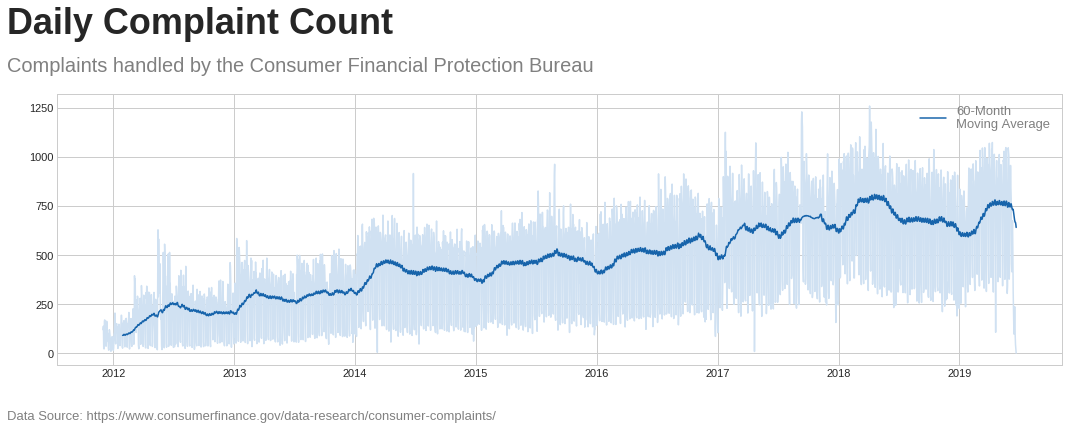

In [ ]:
# timeseries plot with rolling mean

plt.style.use('seaborn-whitegrid')
colors=cm.Blues(np.linspace(0.2,0.8,5))
fig, ax = plt.subplots(1,1,figsize=(18,5))

plt.plot(df_dates, color=colors[0]);
plt.plot(df_dates.rolling(60).mean(),
         label='60-Month\nMoving Average',
         color=colors[4]
        ) 

legend = plt.legend(fontsize=13)
for text in legend.get_texts():
  plt.setp(text, color='gray')
  
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

xpos = -0.05
plt.text(s="Daily Complaint Count",
         x=xpos, y=1.22,
         fontsize=36, fontweight='bold',
         transform=ax.transAxes
        )
plt.text(s="Complaints handled by the Consumer Financial Protection Bureau",
         x=xpos, y=1.08,
         fontsize=20, color='gray',
         transform=ax.transAxes
        );
str="Data Source: https://www.consumerfinance.gov/data-research/consumer-complaints/"
plt.text(s=str, x=xpos, y=-0.2,
         fontsize=13, color='gray',
         transform=ax.transAxes
        );

In [ ]:
df_means = df_dates.rolling(60).mean().reset_index()
df_means.head(2)

,datereceived,Complaint ID
0,2011-12-01,NaN
1,2011-12-02,NaN


In [ ]:
df_means.rename(columns={'datereceived': 'ds', 
                         'Complaint ID': 'y'},
               inplace=True)

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a  

In [ ]:
# The Facebook Prophet package was released in 2017 for Python
# and R, and data scientists around the world rejoiced. 
# Prophet is designed for analyzing time series with daily 
# observations that display patterns on different time scales. 
# It also has advanced capabilities for modeling the effects 
# of holidays on a time-series and implementing custom 
# changepoints, but we will stick to the basic functions 
# to get a model up and running. Prophet, like quandl, can 
# be installed with pip from the command line.

import fbprophet

# Make the prophet model and fit on the data
model = fbprophet.Prophet(changepoint_prior_scale=0.001)
model.fit(df_means)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# make 2 years prediction
df_future = model.make_future_dataframe(periods=365*5, 
                                        freq='D')
forecast = model.predict(df_future)

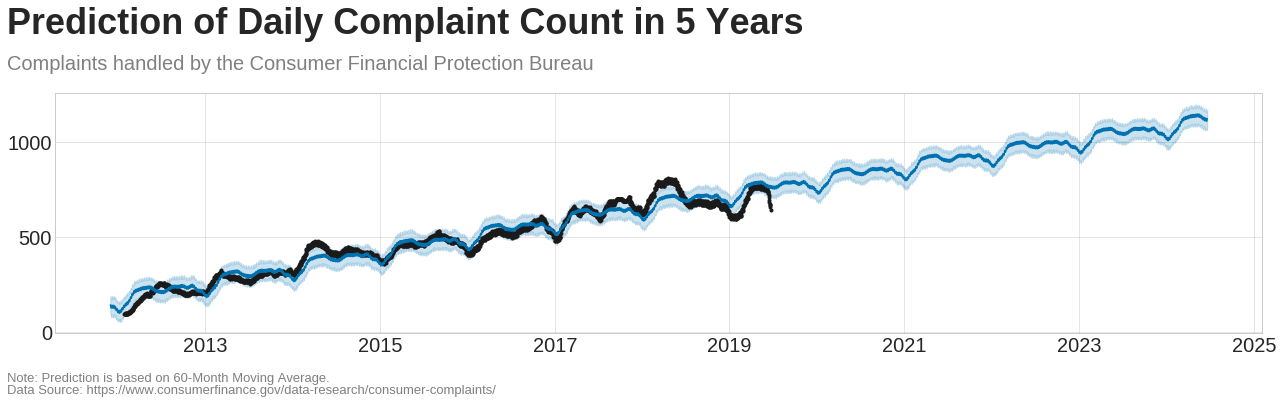

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(18,4))
model.plot(forecast, xlabel='', ylabel='',
           ax=ax)

xpos = -0.04
plt.text(s="Prediction of Daily Complaint Count in 5 Years",
         x=xpos, y=1.25,
         fontsize=36, fontweight='bold',
         transform=ax.transAxes
        )
plt.text(s="Complaints handled by the Consumer Financial Protection Bureau",
         x=xpos, y=1.1,
         fontsize=20, color='gray',
         transform=ax.transAxes
        );
str="Note: Prediction is based on 60-Month Moving Average."
plt.text(s=str, x=xpos, y=-0.2,
         fontsize=13, color='gray',
         transform=ax.transAxes
        );
str="Data Source: https://www.consumerfinance.gov/data-research/consumer-complaints/"
plt.text(s=str, x=xpos, y=-0.25,
         fontsize=13, color='gray',
         transform=ax.transAxes
        );

**Dataset Descriptions**  
https://files.consumerfinance.gov/f/documents/201704_cfpb_Summary_of_Product_and_Sub-product_Changes.pdf   
https://files.consumerfinance.gov/f/documents/201704_cfpb_Consumer_Complaint_Form_Product_and_Issue_Options.pdf  

In [ ]:
# check product, 18 products
# because of the changes in product names, 
# need to map old ones to new ones
df['Product'].value_counts()

Mortgage                                                                        280698
Debt collection                                                                 250476
Credit reporting, credit repair services, or other personal consumer reports    242240
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Student loan                                                                     52430
Credit card or prepaid card                                                      50655
Checking or savings account                                                      43438
Consumer Loan                                                                    31605
Vehicle loan or lease                                                            12032
Money transfer, virtual currency, or money 

**Deloitte Report**  
https://www2.deloitte.com/content/dam/Deloitte/us/Documents/regulatory/us-aers-the-power-of-complaints-042115.pdf  
<img src="https://drive.google.com/uc?id=1sD2JEFoJOV0G6n-wdLK0lmUE0roMW7uC" width="500">

In [ ]:
# check products from Jul 21, 2011 to June 30 ,2014
# 1. data before Dec 2011 is missing in the dataset
# 2. percentages are different from the chart above
#    maybe used different aggregation of products

condition = ((df['datereceived']>datetime(2011, 7, 21)) &
             (df['datereceived']<datetime(2014, 6, 30))
            )
total_counts = df[condition]['Product'].shape[0]
df1 = df[condition]['Product'].value_counts().reset_index()
df1['percentage'] = df1['Product'] / total_counts
print('total counts:', total_counts)
print('total percentage:', df1['percentage'].sum())
df1

total counts: 260733
total percentage: 1.0


,index,Product,percentage
0,Mortgage,111197,0.426478
1,Credit card,36826,0.141240
2,Bank account or service,33019,0.126639
3,Debt collection,31442,0.120591
4,Credit reporting,30938,0.118658
5,Student loan,8001,0.030687
6,Consumer Loan,7206,0.027637
7,Money transfers,1173,0.004499
8,Payday loan,931,0.003571


**How to draw pie charts**  
https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f  
**Choosing Colormaps**  
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html  
**Pie chart labels**  
https://matplotlib.org/3.1.0/gallery/pie_and_polar_charts/pie_and_donut_labels.html  

In [ ]:
from matplotlib.pyplot import cm
colors=cm.rainbow(np.linspace(0,1,len(df1)))
print(colors)

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.49019608e-01 3.84105749e-01 9.80634770e-01 1.00000000e+00]
 [1.96078431e-03 7.09281308e-01 9.23289106e-01 1.00000000e+00]
 [2.52941176e-01 9.25637660e-01 8.30184031e-01 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [7.54901961e-01 9.20905518e-01 5.52364973e-01 1.00000000e+00]
 [1.00000000e+00 7.00543038e-01 3.78411050e-01 1.00000000e+00]
 [1.00000000e+00 3.72701992e-01 1.89801093e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


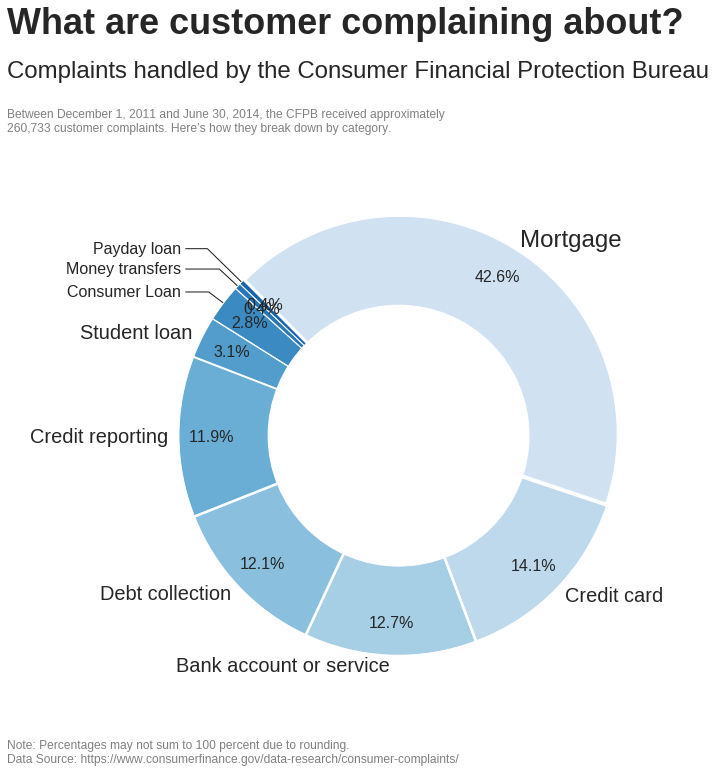

In [ ]:
# draw a pie chart first lol

plt.rcParams['font.size'] = 16
colors=cm.Blues(np.linspace(0.2,0.8,len(df1)))
fig, ax = plt.subplots(figsize=(20, 10), 
                       subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts= (
  ax.pie(df1['Product'], 
         colors=colors,
         labels=df1['index'].to_list()[:-3]+['']*3, 
         labeldistance=1.05,
         autopct='%1.1f%%', 
         startangle=135, 
         pctdistance=0.85, 
         explode = [0.01]*len(df1),
         counterclock=False,
))
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf() # get the current figure
fig.gca().add_artist(centre_circle);

texts[0].set_fontsize(24)
for i in range(1,5):
  texts[i].set_fontsize(20)

# bbox_props = dict(boxstyle="square,pad=0.3", 
#                   fc="w", ec="k", lw=1.1
#                  )
kw = dict(arrowprops=dict(arrowstyle="-",
                          color='k'
                         ),
#           bbox=bbox_props, 
          zorder=0, 
          va="center")
for i, p in enumerate(wedges):
  if i > len(df1)-4:
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 
                           1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": 
                             connectionstyle})
    ax.annotate(df1['index'][i], xy=(x, y), 
                xytext=(np.sign(x), 0.2*y+0.09*i),
                horizontalalignment=horizontalalignment, 
                **kw) 
    
plt.text(s="What are customer complaining about?",
         x=-1.8, y=1.85,
         fontsize=36, fontweight='bold'
         )
plt.text(s="Complaints handled by the Consumer Financial Protection Bureau",
         x=-1.8, y=1.65,
         fontsize=24
        )
str=("Between December 1, 2011 and June 30, 2014, the CFPB received approximately\n"+
     "260,733 customer complaints. Here’s how they break down by category.")
plt.text(s=str, x=-1.8, y=1.4,
         fontsize=12, color='gray'
        );
str=("Note: Percentages may not sum to 100 percent due to rounding.\n"+
     "Data Source: https://www.consumerfinance.gov/data-research/consumer-complaints/")
plt.text(s=str, x=-1.8, y=-1.5,
         fontsize=12, color='gray'
        );

In [ ]:
# check sub-products from Jul 21, 2011 to June 30 ,2014

total_counts = df[condition]['Sub-product'].shape[0]
df2 = df[condition]['Sub-product'].value_counts().reset_index()
df2['percentage'] = df2['Sub-product'] / total_counts
print('total counts:', total_counts)
print('total percentage:', df2['percentage'].sum())
df2

total counts: 260733
total percentage: 0.7365312407712102


,index,Sub-product,percentage
0,Other mortgage,49951,0.191579
1,Conventional fixed mortgage,32041,0.122888
2,Checking account,25095,0.096248
3,Conventional adjustable mortgage (ARM),11890,0.045602
4,FHA mortgage,9650,0.037011
5,Non-federal student loan,8826,0.033851
6,"Other (i.e. phone, health club, etc.)",8789,0.033709
7,Credit card,7028,0.026955
8,I do not know,6707,0.025724
9,Vehicle loan,4734,0.018157


In [ ]:
# check product/sub-products from Jul 21, 2011 
# to June 30 ,2014

(df[condition]
   .fillna('-')
   .groupby(by=['Product', 'Sub-product'], as_index=False)
   .agg({'Complaint ID': pd.Series.nunique})
   .sort_values(by=['Product', 'Complaint ID'], 
                ascending=(True, False))
)

# we can see that for prodcuts such as "Credit card", 
# "Credit Reporting", "Payday Loan", there are not
# sub-products

,Product,Sub-product,Complaint ID
2,Bank account or service,Checking account,25095
3,Bank account or service,Other bank product/service,3707
4,Bank account or service,Savings account,2212
0,Bank account or service,(CD) Certificate of deposit,1763
1,Bank account or service,Cashing a check without an account,242
8,Consumer Loan,Vehicle loan,4734
6,Consumer Loan,Personal line of credit,1001
5,Consumer Loan,Installment loan,950
7,Consumer Loan,Vehicle lease,521
9,Credit card,-,36826


## Consolidate Products                                                                 

https://files.consumerfinance.gov/f/documents/201704_cfpb_Summary_of_Product_and_Sub-product_Changes.pdf  

In [ ]:
df_prd = (df.fillna('-')
   .groupby(by=['Product', 'Sub-product'], as_index=False)
   .agg({'Complaint ID': pd.Series.nunique})
   .sort_values(by=['Product', 'Complaint ID'], 
                ascending=(True, False))
)
print(df_prd.shape)
df_prd

(99, 3)


,Product,Sub-product,Complaint ID
2,Bank account or service,Checking account,59045
3,Bank account or service,Other bank product/service,17825
4,Bank account or service,Savings account,5294
0,Bank account or service,(CD) Certificate of deposit,3417
1,Bank account or service,Cashing a check without an account,625
6,Checking or savings account,Checking account,32461
7,Checking or savings account,Other banking product or service,6826
9,Checking or savings account,Savings account,2837
5,Checking or savings account,CD (Certificate of Deposit),1285
8,Checking or savings account,Personal line of credit,29


In [ ]:
prds = df_prd['Product'].unique()
subs = df_prd['Sub-product'].unique()

In [ ]:
pd.DataFrame(prds).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Bank account or service,Checking or savings account,Consumer Loan,Credit card,Credit card or prepaid card,Credit reporting,"Credit reporting, credit repair services, or o...",Debt collection,"Money transfer, virtual currency, or money ser...",Money transfers,Mortgage,Other financial service,Payday loan,"Payday loan, title loan, or personal loan",Prepaid card,Student loan,Vehicle loan or lease,Virtual currency


In [ ]:
pd.DataFrame(subs).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,Checking account,Other bank product/service,Savings account,(CD) Certificate of deposit,Cashing a check without an account,Other banking product or service,CD (Certificate of Deposit),Personal line of credit,Vehicle loan,Installment loan,Vehicle lease,Title loan,Pawn loan,-,General-purpose credit card or charge card,Store credit card,General-purpose prepaid card,Government benefit card,Payroll card,Gift card,Student prepaid card,Credit reporting,Other personal consumer report,Credit repair services,Conventional home mortgage,I do not know,"Other (i.e. phone, health club, etc.)",Other debt,Credit card,Credit card debt,Medical,Medical debt,Payday loan,Mortgage,Auto,Auto debt,Payday loan debt,Non-federal student loan,Mortgage debt,Federal student loan,Federal student loan debt,Private student loan debt,Domestic (US) money transfer,Mobile or digital wallet,Virtual currency,International money transfer,Debt settlement,Traveler's check or cashier's check,Money order,Check cashing service,Foreign currency exchange,Refund anticipation check,Other mortgage,Conventional fixed mortgage,FHA mortgage,Conventional adjustable mortgage (ARM),Home equity loan or line of credit,Other type of mortgage,VA mortgage,Home equity loan or line of credit (HELOC),Reverse mortgage,Second mortgage,Check cashing,Credit repair,Traveler’s/Cashier’s checks,General purpose card,Mobile wallet,Gift or merchant card,Government benefit payment card,ID prepaid card,Other special purpose card,Transit card,Electronic Benefit Transfer / EBT card,Federal student loan servicing,Private student loan,Loan,Lease


In [ ]:
# merge products - such a pain

def new_prd(row):
  prd, sub = row[0], row[1]
  new_prd = ""
  
  if prd in [prds[7]]:
    new_prd = prds[7]
  elif prd in [prds[5], prds[6]]:
    new_prd = prds[6]
  elif prd in [prds[10]]:
    new_prd = prds[10]
  # Credit card or prepaid card (previously “Credit card” and “Prepaid card”)  
  elif prd in [prds[3], prds[14], prds[4]]:
    new_prd = prds[4]
  # Checking or savings account (previously Bank account or service)  
  elif prd in [prds[0], prds[1]]:
    new_prd = prds[1]
  # Vehicle loan or lease (previously sub-product of Consumer loan)  
  elif prd==prds[16] or (prd==prds[2] and sub==subs[8]):
    new_prd = prds[16]
  # Student loan (no change to product name)  
  elif prd in [prds[15]]:
    new_prd = prds[15]
  # Payday loan, title loan, or personal loan (previously “Consumer loan” and “Payday loan”)
  elif prd in [prds[13], prds[12]] or (prd==prds[2] and sub!=subs[8]):
    new_prd = prds[13]
  # Money transfer, virtual currency, or money service (previously “Money transfers,” “Other financial service,” and “Prepaid card”)  
  elif prd in [prds[8], prds[17], prds[9], prds[11], prds[14]]:
    new_prd = prds[8]
  
  return new_prd

In [ ]:
df_prd['new'] = df_prd.iloc[:,:2].apply(new_prd, axis=1)
df_prd.sample(6)

,Product,Sub-product,Complaint ID,new
39,Debt collection,Mortgage debt,2509,Debt collection
48,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,3192,"Money transfer, virtual currency, or money ser..."
16,Credit card,-,89190,Credit card or prepaid card
57,Money transfers,International money transfer,2770,"Money transfer, virtual currency, or money ser..."
81,"Payday loan, title loan, or personal loan",Title loan,814,"Payday loan, title loan, or personal loan"
4,Bank account or service,Savings account,5294,Checking or savings account


In [ ]:
# verify consolidation
df_prd[df_prd['new']=='']

,Product,Sub-product,Complaint ID,new


In [ ]:
df3 = (df_prd.groupby(by='new')
             .agg({'Complaint ID': np.sum})
             .sort_values('Complaint ID', ascending=False)
             .reset_index()
      )
print(df3['Complaint ID'].sum())
df3

1315085


,new,Complaint ID
0,"Credit reporting, credit repair services, or o...",382672
1,Mortgage,280698
2,Debt collection,250476
3,Credit card or prepaid card,143664
4,Checking or savings account,129644
5,Student loan,52430
6,Vehicle loan or lease,29814
7,"Payday loan, title loan, or personal loan",28478
8,"Money transfer, virtual currency, or money ser...",17209


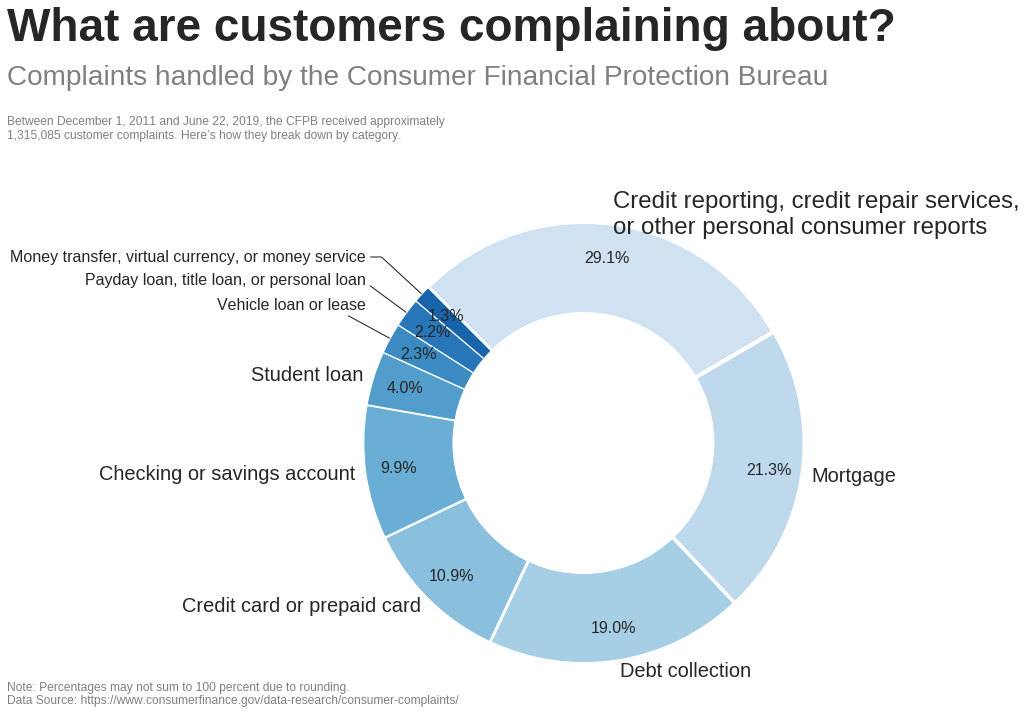

In [ ]:
plt.rcParams['font.size'] = 16
plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams['axes.facecolor'] = 'black'
colors=cm.Blues(np.linspace(0.2,0.8,len(df3)))

fig, ax = plt.subplots(figsize=(20, 10), 
                       subplot_kw=dict(aspect="equal"))

labels = df3['new'].to_list()[:-3]+['']*3
labels[0] = labels[0][:41] + '\n' + labels[0][42:]

wedges, texts, autotexts= (
  ax.pie(df3['Complaint ID'], 
         colors=colors,
         labels=labels, 
         labeldistance=1.05,
         autopct='%1.1f%%', 
         startangle=135, 
         pctdistance=0.85, 
         explode = [0.01]*len(df3),
         counterclock=False,
))
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf() # get the current figure
fig.gca().add_artist(centre_circle);

texts[0].set_fontsize(24)
for i in range(1,5):
  texts[i].set_fontsize(20)

# bbox_props = dict(boxstyle="square,pad=0.3", 
#                   fc="w", ec="k", lw=1.1
#                  )
kw = dict(arrowprops=dict(arrowstyle="-",
                          color='k'
                         ),
#           bbox=bbox_props, 
          zorder=0, 
          va="center")
for i, p in enumerate(wedges):
  if i > len(df3)-4:
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 
                           1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": 
                             connectionstyle})
    ax.annotate(df3['new'][i], xy=(x, y), 
                xytext=(np.sign(x), 0.2*y+0.09*i),
                horizontalalignment=horizontalalignment, 
                **kw) 

xpos = -2.65
plt.text(s="What are customers complaining about?",
         x=xpos, y=1.85,
         fontsize=46, fontweight='bold'
         )
plt.text(s="Complaints handled by the Consumer Financial Protection Bureau",
         x=xpos, y=1.65,
         fontsize=28, color='gray'
        )
str=("Between December 1, 2011 and June 22, 2019, the CFPB received approximately\n"+
     "1,315,085 customer complaints. Here’s how they break down by category.")
plt.text(s=str, x=xpos, y=1.4,
         fontsize=12, color='gray'
        );
str=("Note: Percentages may not sum to 100 percent due to rounding.\n"+
     "Data Source: https://www.consumerfinance.gov/data-research/consumer-complaints/")
plt.text(s=str, x=xpos, y=-1.2,
         fontsize=12, color='gray'
        );

# timeseries plot for each product

In [ ]:
# consolidate products for the whole dataset
df['new'] = df.iloc[:,1:3].apply(new_prd, axis=1)

In [ ]:
# verify consolidation
df[df['new']=='']

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,datereceived,datesent,new


In [ ]:
df4 = (df.groupby(by=['new', 'datereceived'], 
                  as_index=True)
         .agg({'Complaint ID': pd.Series.nunique})
     )
df4.head(5)

Complaint ID
new                         datereceived              
Checking or savings account 2012-03-01              44
                            2012-03-02              26
                            2012-03-03               5
                            2012-03-04              21
                            2012-03-05             136

In [ ]:
daily_average = df4.sum() / (df.datereceived.max()-df.datereceived.min()).days
daily_average

Complaint ID    476.480072
dtype: float64

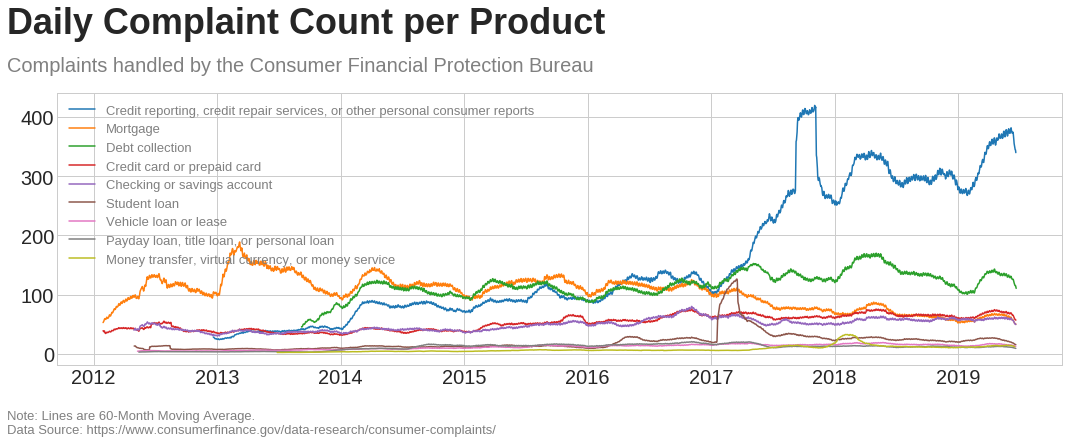

In [ ]:
# timeseries plot with rolling means

plt.style.use('seaborn-whitegrid')
colors=cm.tab10(np.linspace(0,1,10))
fig, ax = plt.subplots(1,1, figsize=(18,5))

for i,prd in enumerate(df3['new']):
  df_tmp=(df4.loc[prd]
          .rolling(60)
          .mean())
  plt.plot(df_tmp,
           label=prd,
           color=colors[i],
          )
  plt.legend()

legend = plt.legend(fontsize=13)
for text in legend.get_texts():
  plt.setp(text, color='gray')

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

xpos = -0.05
plt.text(s="Daily Complaint Count per Product",
         x=xpos, y=1.22,
         fontsize=36, fontweight='bold',
         transform=ax.transAxes
        )
plt.text(s="Complaints handled by the Consumer Financial Protection Bureau",
         x=xpos, y=1.08,
         fontsize=20, color='gray',
         transform=ax.transAxes
        );
str="Note: Lines are 60-Month Moving Average."
plt.text(s=str, x=xpos, y=-0.2,
         fontsize=13, color='gray',
         transform=ax.transAxes
        );
str="Data Source: https://www.consumerfinance.gov/data-research/consumer-complaints/"
plt.text(s=str, x=xpos, y=-0.25,
         fontsize=13, color='gray',
         transform=ax.transAxes
        );

# circle1=plt.Circle((0.8,0.8),.08,
#                    color='black', 
#                    fill=False,
#                    linewidth=0.5,
#                    alpha=0.8
#                   )
# plt.gcf().add_artist(circle1);

# outburst of Credit reporting complaint

In [ ]:
# Credit reporting, credit repair services, or other personal consumer reports
print(prds[6])

Credit reporting, credit repair services, or other personal consumer reports


In [ ]:
condition=((df['new']==prds[6]) &
           ((df['datereceived']>=datetime(2017,6,1)) | 
            (df['datereceived']<=datetime(2018,1,1)))
          )
df_cr = df[condition]

In [ ]:
# how many complaits in that period
print(df_cr.shape)

(382672, 21)


In [ ]:
# Credit report was complained the most during that period
(df_cr.groupby(by='Sub-product')
      .agg({'Complaint ID':pd.Series.nunique})
      .sort_values(by='Complaint ID',
                   ascending=False)
)

,Complaint ID
Sub-product,
Credit reporting,237652
Other personal consumer report,3727
Credit repair services,860
Conventional home mortgage,1


In [ ]:
# two companies were complained the most
(df_cr.groupby(by='Company')
      .agg({'Complaint ID':pd.Series.nunique})
      .sort_values(by='Complaint ID',
                   ascending=False)
      .head()
)

,Complaint ID
Company,
"EQUIFAX, INC.",118210
Experian Information Solutions Inc.,105717
"TRANSUNION INTERMEDIATE HOLDINGS, INC.",99474
CAPITAL ONE FINANCIAL CORPORATION,4193
"CITIBANK, N.A.",2584


**The great Equifax mystery: 17 months later, the stolen data has never been found, and experts are starting to suspect a spy scheme**   
PUBLISHED WED, FEB 13 2019  3:33 PM ESTUPDATED WED, FEB 13 2019  7:01 PM EST   
https://www.cnbc.com/2019/02/13/equifax-mystery-where-is-the-data.html   

**CFPB: Complaints About Credit Reporting Agencies Almost Doubled in 2017**  
Consumer grievances regarding credit or consumer reporting made up 31 percent plurality of all complaints  
BY RYAN RAINEY April 2, 2018 at 3:02 pm ET  
https://morningconsult.com/2018/04/02/cfpb-complaints-about-credit-reporting-agencies-almost-doubled-in-2017/  

https://en.wikipedia.org/wiki/Equifax#March_2017_security_breach    

In [ ]:
# sample the Consumer complaint narrative

condition=((df_cr['Sub-product']=='Credit reporting') &
           (df_cr['Company']=='EQUIFAX, INC.') &
           (df_cr['Consumer complaint narrative'].isna()==False)
          )
(df_cr[condition]['Consumer complaint narrative']
 .str.find('data breach')
)

49832       -1
50116       -1
50352       -1
50397       -1
51105       -1
52015       -1
52417       -1
53138       -1
53251       -1
53757       -1
53982       -1
54183       -1
54215     2800
54267       -1
54543       -1
54613       -1
54631       -1
54649       -1
54675       -1
54681       -1
54697       -1
54711       -1
54921       -1
54934       -1
54943       -1
55078       -1
55096       -1
55112       -1
55940       -1
56003       -1
56008       -1
56227       -1
56241       -1
56306       -1
56701       -1
57503       -1
57522       -1
58446       -1
58531       -1
58591       -1
58824       -1
58834       -1
58968       -1
59224       -1
59532       -1
59536       -1
59751       -1
59765       -1
59797       -1
59809       -1
59821       -1
59875       -1
59889       -1
59941       -1
59943       -1
59949       -1
59997       -1
60031       -1
60059       -1
60247       -1
60440       -1
60462       -1
60564       -1
60678       -1
60695       -1
60852       -1
60952     

In [ ]:
print(df.loc[54215, 'Consumer complaint narrative'])

I was involved in the security breach with Equifax credit bureau. As a result, I had the credit monitoring service Trusted ID Premier under Equifax for a certain period of time. When the time expired, I was given an option by Equifax to sign-up for XXXX XXXX under XXXX. At the time, I signed-up for ID Notify, there were a number of technical issues that I experienced when activating the account on their website. It took me several hours to sign-up for XXXX  XXXX because of the technical issues that I had with its website. 
About a month later, I attempted to log into XXXX  XXXX to review my account but was unable to do so. After several attempts to log into XXXX  XXXX unsuccessfully, I contacted XXXX. I spent about an hour trying reach a customer service representative to speak with because I continued to get automated responses. The customer representative for XXXX that I spoke with worked with me for about 30 minutes to log into the XXXX  XXXX site. When she was unable to assist me w

https://files.consumerfinance.gov/f/201212_cfpb_credit-reporting-white-paper.pdf  
The U.S. credit reporting system encompasses a vast flow and store of
information. **The NCRAs each maintain credit files on over 200,000,000 adults and
receive information from approximately 10,000 furnishers of data.** On a monthly basis,
these furnishers provide information on over 1.3 billion consumer credit accounts or
other “trade lines.”  

# outburst of Student loan complaint

In [ ]:
# Student loan
condition=((df['new']==prds[15]) &
           ((df['datereceived']>=datetime(2017,1,1)) | 
            (df['datereceived']<=datetime(2017,6,30)))
          )
df_sl = df[condition]

In [ ]:
# how many complaits in that period
print(df_sl.shape)

(52430, 21)


In [ ]:
# what sub-product was complained the most during that period
(df_sl.groupby(by='Sub-product')
      .agg({'Complaint ID':pd.Series.nunique})
      .sort_values(by='Complaint ID',
                   ascending=False)
)

,Complaint ID
Sub-product,
Federal student loan servicing,22925
Non-federal student loan,22283
Private student loan,7222


In [ ]:
# Navient Solutions, LLC. were complained the most
(df_sl.groupby(by='Company')
      .agg({'Complaint ID':pd.Series.nunique})
      .sort_values(by='Complaint ID',
                   ascending=False)
      .head()
)

,Complaint ID
Company,
"Navient Solutions, LLC.",25461
AES/PHEAA,7550
"NELNET, INC.",2353
SLM CORPORATION,1650
WELLS FARGO & COMPANY,1645


**Navient Ranks Highest For Student Loan Complaints**   
Zack Friedman Senior Contributor 
Personal Finance
Author, The Lemonade Life. I write about leadership and greatness.  
Jan 14, 2019, 08:32am  
https://www.forbes.com/sites/zackfriedman/2019/01/14/navient-complaints-student-loans/#1959a0d75152  

Complaints ranged from "received bad information about your loan" and "trouble with how payments are handled" to "don't agree with the fees charged" and "problem with customer service," among others.

Navient, which spun off from Sallie Mae, has more than 12 million customers and services more than $300 billion of government and private student loans.

The CFPB noted that Navient provided a timely response to 98% of these consumer complaints.

This follows action from the Consumer Financial Protection Bureau (CFPB), which **sued Navient in January 2017 for allegedly "systematically and illegally [failing] borrowers at every stage of repayment,"** including:

* created obstacles to repayment by providing bad information;
* processed payments incorrectly;
* failed to act when borrowers complained;
* illegally cheated many struggling borrowers out of their rights to lower payments, which caused them to overpay for their student loans;
* deceived private student loan borrowers about requirements to release their co-signer from the loan; and
harmed the credit of disabled borrowers, including severely injured veterans

**According to a 2017 U.S. Department of Education audit of Navient, Navient may have steered student loan borrowers into higher payment plans without discussing with borrowers potentially lower cost options.**

In [ ]:
# sample the Consumer complaint narrative

condition=((df_cr['Sub-product']=='Credit reporting') &
           (df_cr['Company']=='Navient Solutions, LLC.') &
           (df_cr['Consumer complaint narrative'].isna()==False)
          )
(df_cr[condition]['Consumer complaint narrative']
#  .str.find('data breach')
 .sample().to_list()
)

['I contacted Navient to conduct a fraud investigation for a loan that was taken out in my name. In XXXX, I submitted their identify theft packet that included police reports, witness statements, signature samples and notarized documents to obtain financial records from my school and any other party deemed necessary. A through investigation wasnt completed on my behalf. They didnt request documents from the school in a timely fashion to verify how my schooling was funded. They failed to do a forensics investigation for signature comparisons and admitted they are not trained to do so. The rep handling the cases said although they looked similar he didnt believe it was my signature. \n\nThey then began to question me as to why I didnt peruse this sooner, then wanted me to have the person who committed the crime to confess instead of doing the work on their end. This wasnt properly handled and Im being punished for something I didnt do or have knowledge of. The reason I believe they are u

"Navient-XXXX XXXXXXXX violated their lending practices and I would like to add my name to the pending law suit that has been established. I was told by my school XXXX University, which I attend the XXXX XXXX, to utilize XXXX which is now known as Navient. The school not only misadvise me as well as other students to take other classes that I and other student did not need to take which caused additional finances. During my studies, there where an advisor by the name of XXXX who had misadvise me and other students wrongfully which caused an extra money from the student loans awarded. Nevertheless ; I graduated in 2012 as a XXXX XXXX with a XXXX and due to the predatory lending and other unethical practice from XXXX XXXX, high interest, loan information changes and transfers which has been a disservices has yet to receive my degree from the school 's financial aid department. The school has had a hold on my degree for 5 years 3 months now. The unfair and predatory lending has also tarnish my credit report. After reviewing my credit report once again, the loans has been transferred to other companies, the status is unknown, missing and inaccurate reporting. Please help me and others remedy this solution so I am able to restore my credit and get my degree. I had to pay money directly to the financial office in Florida, I hope that I can get a full refund on money the excessive money that I had to spend out due to miss advisement, bad behavioral and illegal violations of the CFPB."  

In [ ]:
print(df['datereceived'].max())
print(df['datereceived'].min())

2019-06-22 00:00:00
2011-12-01 00:00:00
